In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math as math

In [5]:
confirmed = pd.read_csv('Dane_covid/covid_confirmed.csv')
deaths = pd.read_csv('Dane_covid/covid_deaths.csv')
recovered = pd.read_csv('Dane_covid/covid_recovered.csv')
data = [confirmed, deaths, recovered]

for i, item in enumerate(data):
    item['Province/State'].fillna('', inplace = True)
    item['Country'] = (item['Country/Region'] +' '+ item['Province/State']).str.strip()
    item.drop(columns = ['Province/State','Country/Region', 'Lat', 'Long'], inplace = True)
    item.set_index('Country', inplace = True)
    data[i] = item.transpose()

In [6]:
import copy
diff = copy.deepcopy(data)

for a, item in enumerate(data):
    for i in range(1, item.shape[0]):
        for j in range (0, item.shape[1]):
            diff[a].iloc[i,j] = data[a].iloc[i,j] - data[a].iloc[i-1,j]

In [7]:
countries = ['Poland', 'Germany', 'Spain', 'France']
legend = ['confirmed cases', 'deaths', 'recovered cases']

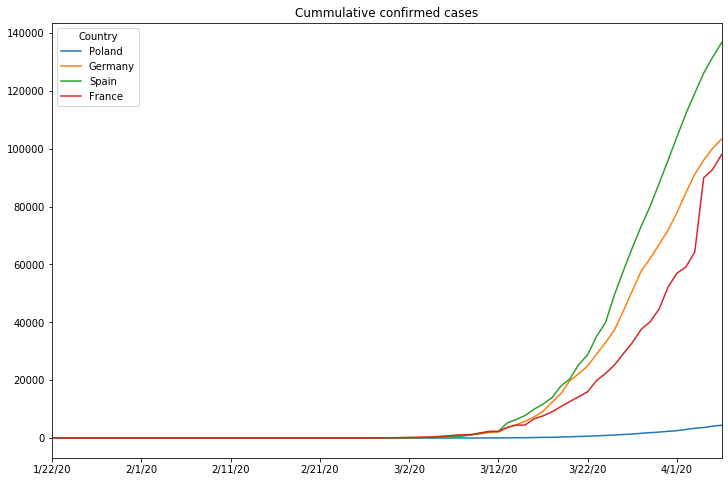

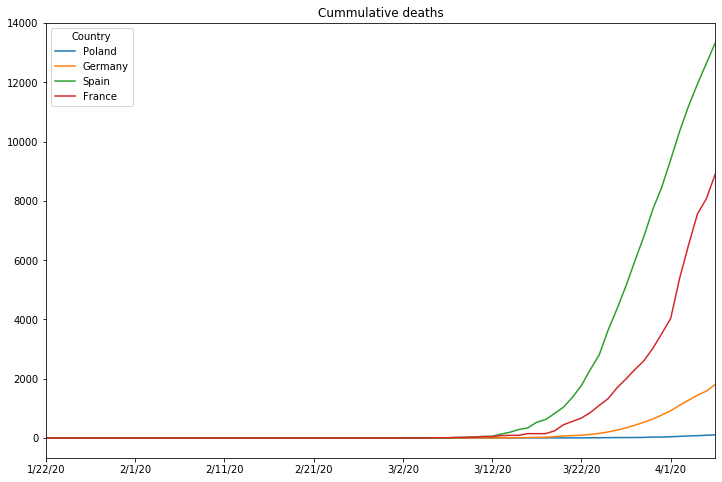

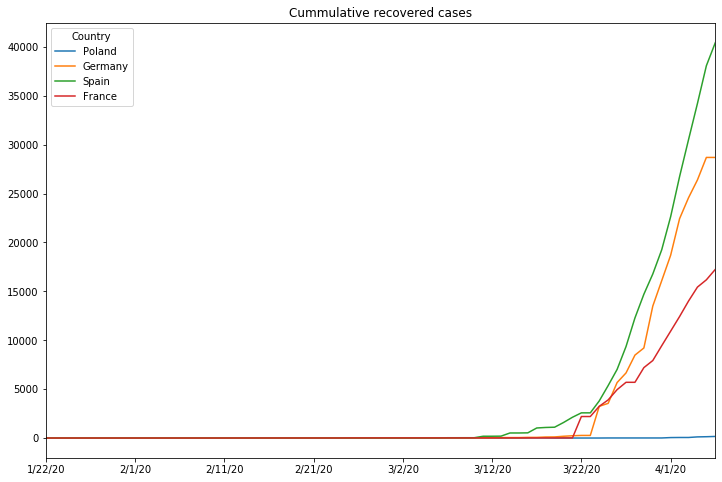

In [8]:
for i, item in enumerate(data):    
    item[countries].plot(figsize = (12, 8), title =  'Cummulative ' + legend[i])

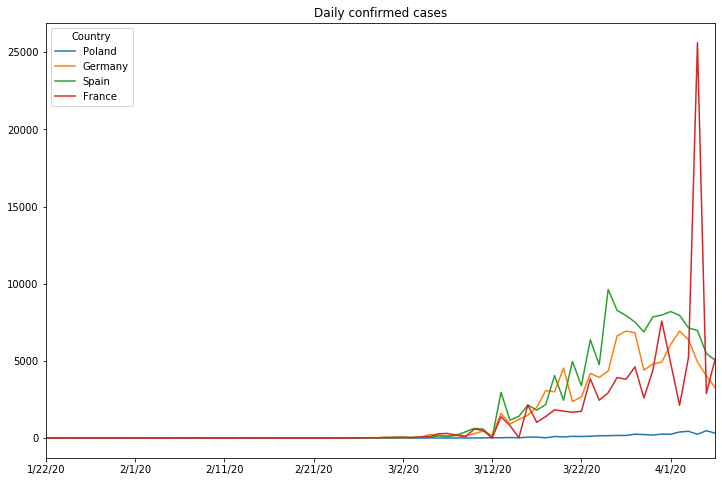

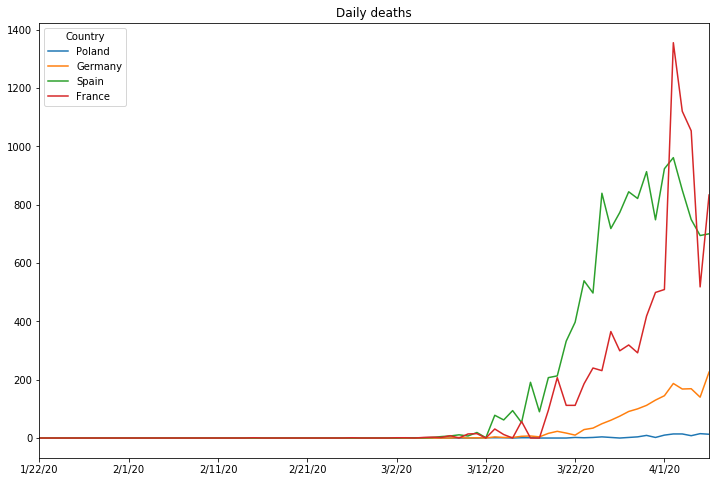

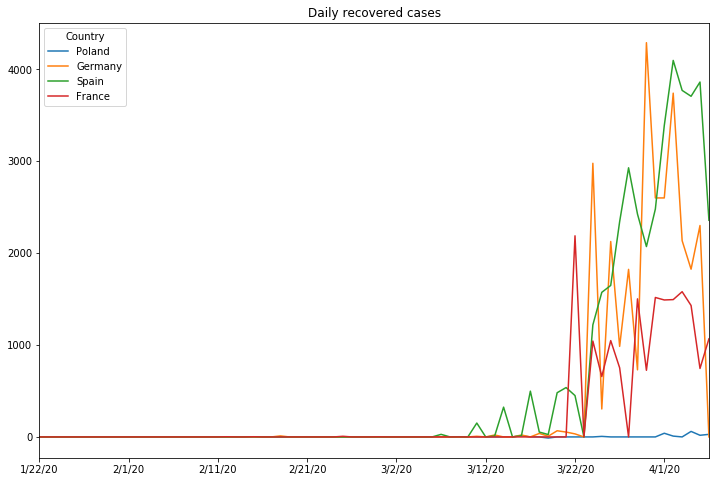

In [9]:
for i, item in enumerate(diff):    
    item[countries].plot(figsize = (12, 8), title = 'Daily ' + legend[i])